In [2]:
import torch
import torch.nn.functional as f
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
chars = sorted(list(set(''.join(words))))
chtoi = {ch:i+1 for i, ch in enumerate(chars)}
chtoi['.']=0
itoch = { i:ch for ch, i in chtoi.items()}

In [49]:
block_size = 3
X, Y = [], []
for w in words[:5]:
    print(w)
    input = [0]*block_size
    for ch in w+'.':
        X.append(input)
        Y.append(chtoi[ch])
        print(f'{"".join(itoch[i] for i in input)} ---> {ch}')
        input = input[1:] + [chtoi[ch]]

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [50]:
X = torch.tensor(X)
Y = torch.tensor(Y)
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [7]:
C = torch.randn((27, 2))
C

tensor([[-0.9182, -0.5553],
        [-0.1225,  0.4573],
        [ 0.5216, -0.6032],
        [ 1.8226,  0.4763],
        [-0.5446, -0.2766],
        [ 1.2753, -0.3434],
        [-0.0155, -1.0462],
        [-0.2745,  0.1608],
        [ 1.2130, -0.7377],
        [-0.3954, -0.7017],
        [-0.7267,  1.5285],
        [-0.3032,  0.9890],
        [ 0.7340, -1.9196],
        [ 0.0765,  0.2410],
        [ 2.4034,  1.1753],
        [ 0.5360,  1.0516],
        [ 0.6241, -1.2760],
        [ 1.8417,  0.4155],
        [-0.1332,  0.0673],
        [ 1.3210,  0.8547],
        [ 0.1048,  0.0734],
        [-1.6537,  0.0315],
        [-0.5569,  0.1361],
        [ 1.0808,  0.7537],
        [ 0.3245, -1.1650],
        [ 0.1541, -0.7390],
        [-0.3169,  1.9322]])

In [8]:
emb = C[X]
emb.shape

torch.Size([16, 3, 2])

In [10]:
emb.shape[0]

16

In [11]:
input_shape = emb.shape[1]*emb.shape[2]
input_shape

6

In [12]:
W1 = torch.randn((input_shape, 100))
b1 = torch.randn(100)

In [16]:
h = torch.tanh(emb.view(-1, input_shape) @ W1 + b1)

In [18]:
h.shape, h

(torch.Size([16, 100]),
 tensor([[-0.4022, -0.6656,  2.2888,  ...,  1.8946, -0.4458,  1.4802],
         [ 1.5705, -1.5143, -0.5324,  ...,  0.1629,  0.2896, -1.1964],
         [ 1.9921, -0.0846, -1.5123,  ...,  1.0045, -2.9183, -3.2068],
         ...,
         [ 0.3768, -0.8554,  0.8062,  ...,  1.1316, -0.1131, -0.9185],
         [-0.3304, -1.0472,  1.0751,  ...,  2.0635, -1.3416, -2.3324],
         [-0.7115, -1.5190,  1.2853,  ...,  1.4599, -0.7922, -1.8785]]))

In [20]:
W2 = torch.randn(100, 27)
b2 =  torch.randn(27)

torch.Size([100, 27])

In [21]:
logits =  h @ W2 + b2

In [23]:
logits.shape, logits

(torch.Size([16, 27]),
 tensor([[ -8.9807,  12.5259,  10.7300,   6.5076,   8.4065,  10.3604,  -6.4691,
          -16.8364, -32.5408,  14.6208, -25.1734, -20.9997,  -2.1132, -23.7852,
          -29.4941,  13.6104, -30.4476,  -9.5897,  -7.4341,  -3.0655,  -1.3249,
           35.2975, -25.6938,  -0.6172,  -7.9907,  15.0752,  25.6180],
         [ 16.0697, -21.1190,  31.6168,  -6.4184, -15.6833, -16.0511,  -2.1754,
            5.0306, -31.4202,   3.7094, -21.4280,  -1.2397, -15.4183, -20.0887,
          -45.2374,  13.1852, -53.2190,  12.2030,  31.4458,  22.8704,  22.8179,
            6.9675, -25.5348,  20.4977,   3.2983,  27.8974,   0.1636],
         [-25.0017,  12.2983,   6.2614,  -1.6917,  36.8044,  -0.6671,  -4.4793,
            4.5874,  -2.3310,  11.0874,   4.9685,  -3.4312,  -5.1914, -28.0060,
            6.2852,  20.8949, -42.8667, -48.3094, -13.6024,  33.1259, -23.4837,
           21.1755, -18.2252,  10.2364,  28.4566,   3.4833,  11.1099],
         [-15.5244,  -6.2522,  25.5234, -24.

In [24]:
counts = torch.exp(logits)
counts.shape

torch.Size([16, 27])

In [26]:
probs = counts/counts.sum(1, keepdim=True)
# probs.shape, probs, probs[0].sum()

(torch.Size([16, 27]),
 tensor([[5.8910e-20, 1.2894e-10, 2.1401e-11, 3.1383e-13, 2.0958e-12, 1.4788e-11,
          7.2607e-19, 2.2830e-23, 3.4528e-30, 1.0476e-09, 5.4674e-27, 3.5513e-25,
          5.6588e-17, 2.1912e-26, 7.2668e-29, 3.8141e-10, 2.8006e-29, 3.2042e-20,
          2.7662e-19, 2.1835e-17, 1.2447e-16, 9.9994e-01, 3.2492e-27, 2.5259e-16,
          1.5854e-19, 1.6502e-09, 6.2551e-05],
         [9.4789e-08, 6.6977e-24, 5.3551e-01, 1.6229e-17, 1.5368e-21, 1.0639e-21,
          1.1298e-15, 1.5225e-12, 2.2500e-28, 4.0619e-13, 4.9170e-24, 2.8800e-15,
          2.0031e-21, 1.8765e-23, 2.2460e-34, 5.2973e-09, 7.6750e-38, 1.9838e-09,
          4.5133e-01, 8.5166e-05, 8.0807e-05, 1.0562e-11, 8.0938e-26, 7.9395e-06,
          2.6929e-13, 1.2986e-02, 1.1717e-14],
         [1.4030e-27, 2.2193e-11, 5.3019e-14, 1.8640e-17, 9.7513e-01, 5.1929e-17,
          1.1477e-18, 9.9406e-15, 9.8351e-18, 6.6122e-12, 1.4552e-14, 3.2732e-18,
          5.6305e-19, 6.9547e-29, 5.4297e-14, 1.2013e-07, 2.445

In [28]:
loss = - probs[torch.arange(X.shape[0]), Y].log().mean()
loss

tensor(43.3172)

# refactored previous code:

In [153]:
# build the dataset
# context length: how many characters do we take to predict the next one?
import random
block_size = 3


def build_dataset(words):
    X, Y = [], []
    for w in words:

        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = chtoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]  # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y


random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [31]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182580, 3]), torch.Size([182580]))

In [79]:
block_size = 3
X, Y = [], []
for w in words:
    # print(w)
    input = [0]*block_size
    for ch in w+'.':
        X.append(input)
        Y.append(chtoi[ch])
        # print(f'{"".join(itoch[i] for i in input)} ---> {ch}')
        input = input[1:] + [chtoi[ch]]
        
X = torch.tensor(X)
Y = torch.tensor(Y)
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [188]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 8), generator=g)
W1 = torch.randn((24, 256), generator=g)
b1 = torch.randn(256, generator=g)
W2 = torch.randn((256, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [189]:
sum(p.nelement() for p in parameters) # number of parameters in total

13555

In [190]:
for p in parameters:
    p.requires_grad = True

In [191]:
lri = []
lossi = []
stepi = []

In [197]:
for i in range(50000):
    # forward pass
    batch_ind = torch.randint(0, Xtr.shape[0], (32,))

    emb = C[Xtr[batch_ind]]  # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 24) @ W1 + b1)  # (32, 100)
    logits = h @ W2 + b2  # (32, 27)
    loss = f.cross_entropy(logits, Ytr[batch_ind])
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

# print(loss.item())

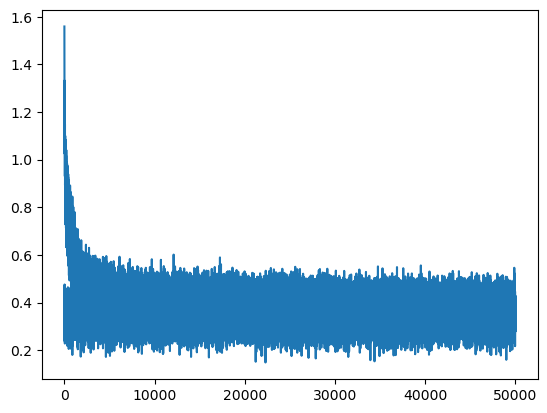

In [198]:
plt.plot(stepi, lossi)

In [199]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 24) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = f.cross_entropy(logits, Ydev)
loss

tensor(2.2046, grad_fn=<NllLossBackward0>)

In [200]:
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 24) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = f.cross_entropy(logits, Yte)
loss

tensor(2.2129, grad_fn=<NllLossBackward0>)

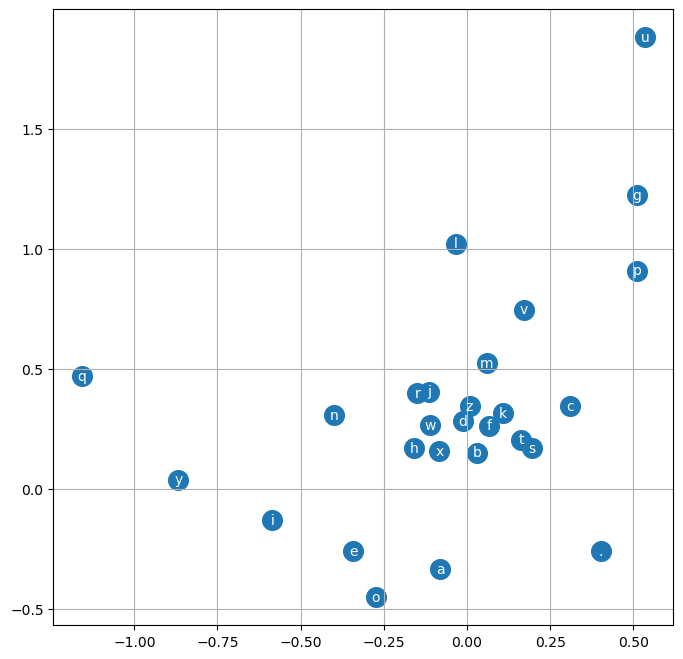

In [183]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itoch[i], ha="center", va="center", color='white')
plt.grid('minor')